In [17]:
import numpy as np 
import pandas as pd

## Encoding of Features ##

In [18]:
# load dataset

# You can download the Titanic data set from here: https://www.kaggle.com/c/titanic/data
# Then import them in Jupyter by clicking on 'Upload Files'
# or use fetch_openml as shown below

from sklearn import preprocessing
X = pd.read_csv('titanic_train.csv', sep=',')
y = X.pop('Survived')

In [19]:
# limit to categorical data
X1 = X.select_dtypes(include=[object]) 
X1

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [21]:
# encode categorical features into binary vectors
enc1 = preprocessing.OneHotEncoder()

# retrieve one-hot encodings as a numpy array
onehotlabels = enc1.fit_transform(X1).toarray() 
print(onehotlabels)


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [22]:
X2 = X[["Pclass"]]

# encode ordinal features with value between 0 and n_classes-1
enc2 = preprocessing.OrdinalEncoder()
enc2.fit(X2)
print(enc2.categories_)
#print(enc2.fit_transform(X2))

[array([1, 2, 3])]


In [23]:
# encode target labels with value between 0 and n_classes-1

enc3 = preprocessing.LabelEncoder() 

# apply label encoding
y = enc3.fit_transform(y) 
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [24]:
# --->>> Your turn <<<----
# What do you think about the idea to use One-hot encoding for the Ticket column?

# This is a bad idea, since there are a lot of different values 
# which would result in too many new feature columns.

In [25]:
# --->>> Your turn <<<---- 
# comparee the number of features with one-hot encoding 
# of the categorical features compared to using 
# grey encoding of the categorical features
X4 = X.select_dtypes(include=[object])
from category_encoders.gray import GrayEncoder
enc4 = GrayEncoder().fit(X4)
greylabels = enc4.transform(X4)

print("Number of onehotfeatures",onehotlabels.shape[1],
      "vs. Number of greyfeatures",greylabels.shape[1])

Number of onehotfeatures 1726 vs. Number of greyfeatures 33


## Missing Values ##

In [ ]:
# Create pandas DataFrame
data = {'Name':['Tom', 'Nick', np.nan], 'Age':[20, np.nan, 18]}
df = pd.DataFrame(data) 
df

,Name,Age
0,Tom,20.0
1,Nick,NaN
2,NaN,18.0


In [26]:
pd.isnull(df)

,Name,Age
0,False,False
1,False,True
2,True,False


In [27]:
# Number of rows with missing Values
sum(pd.isnull(df).any(axis=1))

2

In [28]:
# Replace missing values with 0
df2 = df.fillna(0)
df2

,Name,Age
0,Tom,20.0
1,Nick,0.0
2,0,18.0


In [29]:
# --->>> Your turn <<<----
# How can we apply different replacement values for different columns?

df.fillna({"Age": 21, "Name": "Mary"})

,Name,Age
0,Tom,20.0
1,Nick,21.0
2,Mary,18.0


In [30]:
# Drop Rows with missing data in the Age column
df_dropped = df.dropna(subset=['Age'])
df_dropped

,Name,Age
0,Tom,20.0
2,NaN,18.0


## Missing Values Titanic

In [ ]:
# --->>> Your turn <<<----
# on which columns of the titanic dataset do we have missing values?

X.isnull().any()


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Duplicate Values ##

In [39]:
import pandas as pd

# You can download the Titanic data set from here: https://www.kaggle.com/c/titanic/data
# Then import them in Jupyter by clicking on 'Upload Files'

df_all = pd.read_csv('titanic_train.csv')

# Take a subset
df = df_all.loc[:300, ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']].dropna()

In [40]:
# Count duplicate in a DataFrame
df.duplicated().sum()

2

In [41]:
# Count duplicate on certain columns
df.duplicated(subset=['Survived', 'Pclass', 'Sex']).sum()

52

In [19]:
# --->>> Your turn <<<----
# How many duplicates are there if we only consider the 'Cabin' column?

In [35]:
df.duplicated(subset=['Cabin']).sum()

8

In [36]:
# Display duplicate rows
df.loc[df.duplicated(), :]

,Survived,Pclass,Sex,Cabin,Embarked
124,0,1,male,D26,S
251,0,3,female,G6,S


In [37]:
# they are repetitions of these: 
df.loc[df.duplicated(keep='last'), :]

,Survived,Pclass,Sex,Cabin,Embarked
102,0,1,male,D26,S
205,0,3,female,G6,S


In [38]:
# Remove duplicate rows
# Use keep='last' to keep the last occurrence 
df.drop_duplicates(inplace=True, keep='first')

In [24]:
# --->>> Your turn <<<----
# How can we achieve the same result without using the 'inplace=True' parameter?

In [42]:
df = df.drop_duplicates(keep='first')

## Normalization ##

The features of the California Housing dataset have very different scales and contain some very large outliers. 

These two characteristics lead to difficulties to visualize the data and can degrade the predictive performance of many machine learning algorithms. 

Many estimators are designed with the assumption that each feature takes values close to zero or that all features vary on comparable scales.

In [43]:
# Loading the California Housing dataset
#
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HousAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X_original = X_full[:, features_idx]

In [27]:
# Helper functions for plotting

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)

def create_axes(figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)

    # define the axis for the first plot
    left, width = 0.3, 0.4
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")
    
def make_plot(X):
    ax_zoom_in, ax_colorbar = create_axes()

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        ax_zoom_in,
        X[non_outliers_mask],
        y_full[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

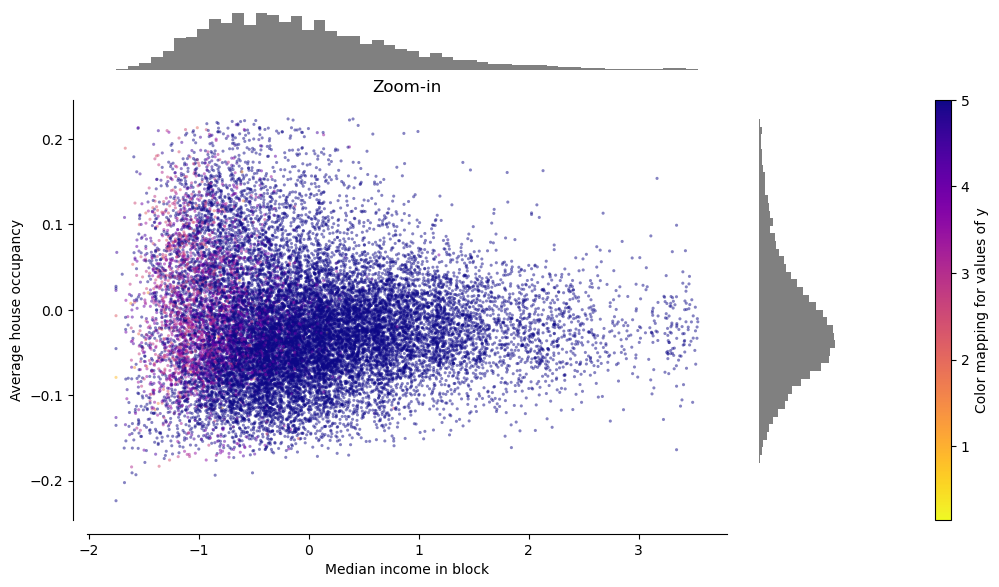

In [28]:
X = StandardScaler().fit_transform(X_original)
make_plot(X)
# StandardScaler cannot guarantee balanced feature scales in the presence of outliers.

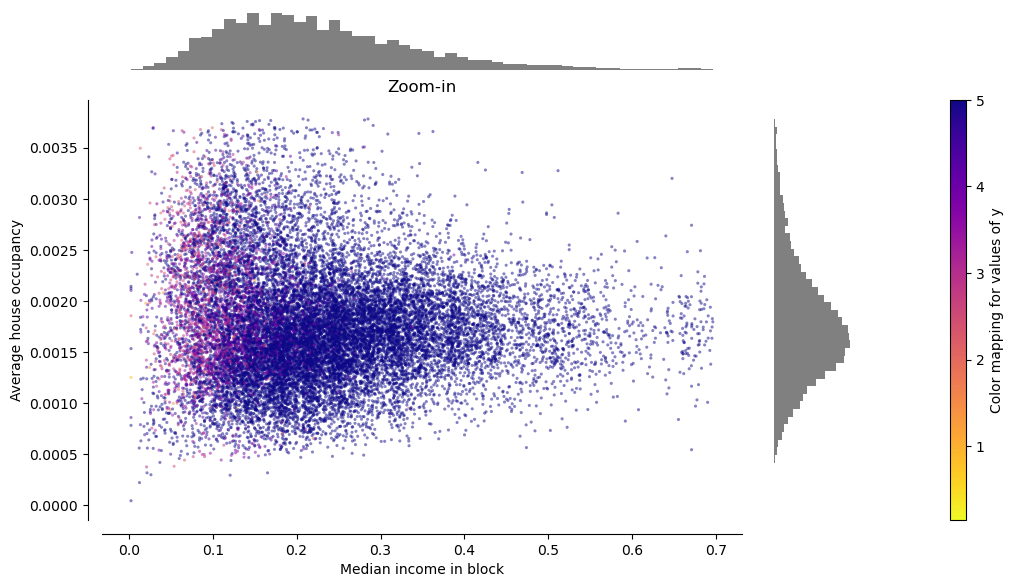

In [29]:
X = MinMaxScaler().fit_transform(X_original)
make_plot(X)
# What to look for: The different scales on the x and y axes

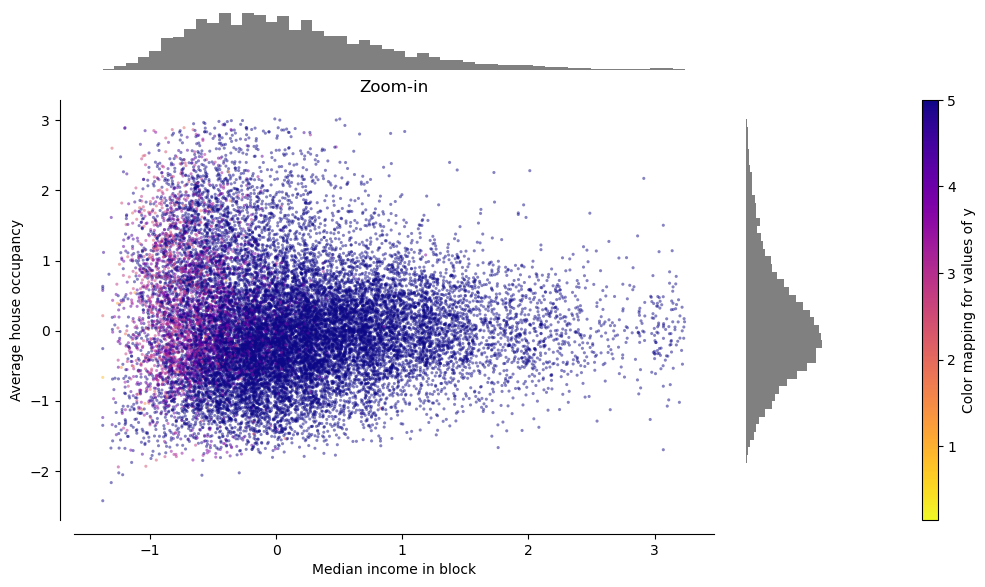

In [30]:
X = RobustScaler(quantile_range=(25, 75)).fit_transform(X_original)
make_plot(X)
# For both features, most of the transformed values lie in a [-2, 3] range

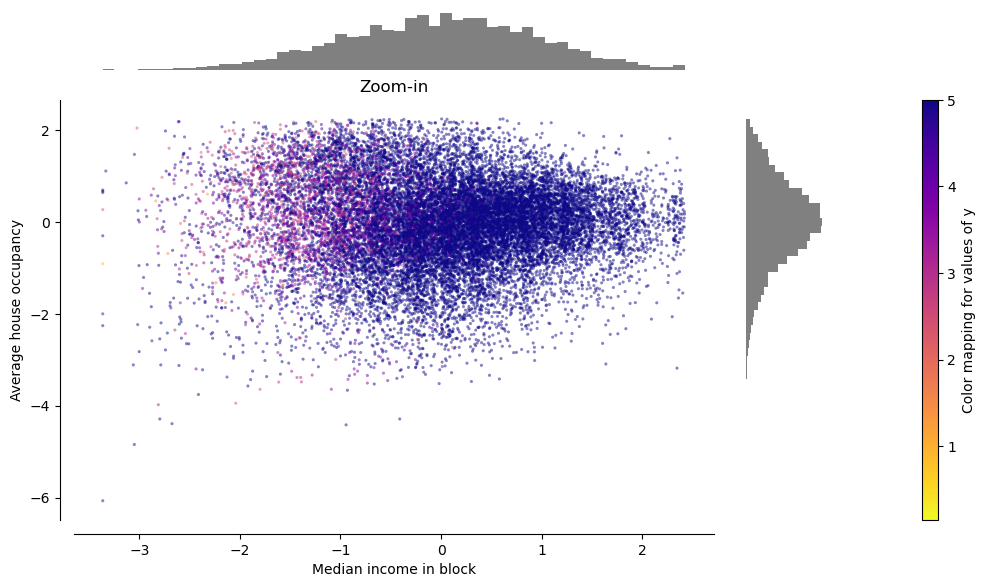

In [31]:
X = PowerTransformer(method="yeo-johnson").fit_transform(X_original)
make_plot(X)

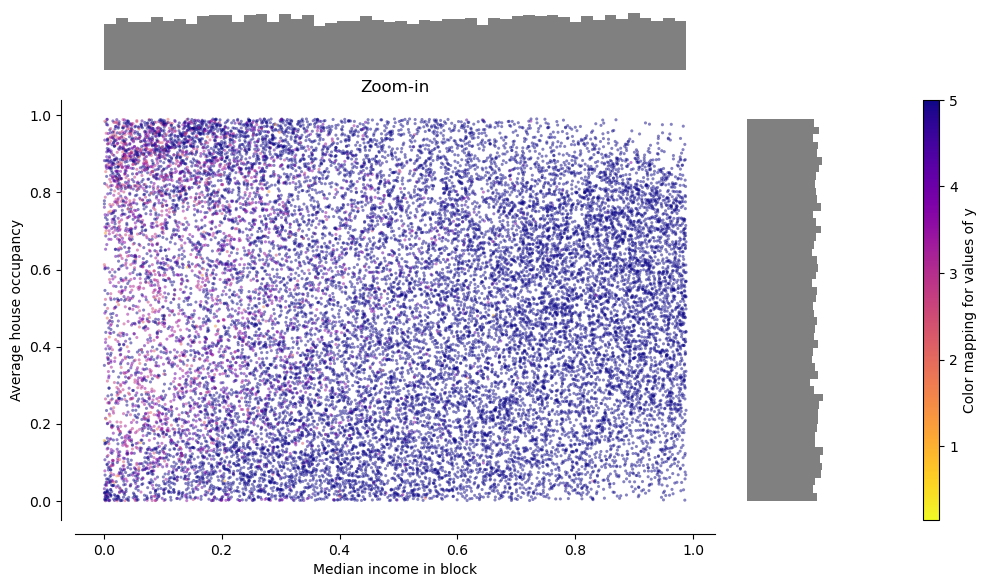

In [32]:
X = QuantileTransformer(output_distribution="uniform").fit_transform(X_original)
make_plot(X)

In [ ]:
# --->>> Your turn <<<----
# When would you use a RobustScaler? When not?
# When is a QuantileTransformer? When not?

#Use a RobustScaler for long-tail distributions or if there are many outliers 
#Use QuantileTransformer if you need a uniform distribution

In [ ]:
# --->>> Your turn <<<----
# In your ML pipeline, where would you put the scaler/transformer?

# After splitting into training and test set, fit the scaler/transformer on the training set
# and apply the transformation to both training and test set.

# e.g. with teh QuantileTransformer:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# fit transformer on training set
QuantileTransformer(output_distribution="uniform").fit(X_train)
# apply transformation to both training and test set
X_train = QuantileTransformer(output_distribution="uniform").transform(X_train)
X_test = QuantileTransformer(output_distribution="uniform").transform(X_test)
